In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv('travel.csv')

# PART I

In [5]:
#A.
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


B.
TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation are categorical,     CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,
NumberOfTrips,Passport, PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome are numerical.

C.In df table, ProdTaken=0 appears 3968 times, ProdTaken==1 appears 920 times.

In [6]:
print(df['ProdTaken'].value_counts())

0    3968
1     920
Name: ProdTaken, dtype: int64


D.I choose Age,NumberOfTrips,MonthlyIncome as independent variables.
From the reaults, I found When ProdTaken=0,the mean of Age around equal 38, when ProdTaken=1, the mean of Age around equal 35. So I think the age will be strongly impactful. I think the NumberOfTrips will not be strongly impactful,because when ProdTaken=1,and ProdTaken=0,the mean of NumberOfTrips only decimal point difference. MonthlyIncome  will be strongly impactful,because when ProdTaken=0 and ProdTaken=1,They differ by about 1,000.

In [7]:
print(df.loc[(df["ProdTaken"]==0),:]["Age"].mean())

38.282091917591124


In [8]:
print(df.loc[(df["ProdTaken"]==1),:]['Age'].mean())

34.77054794520548


In [9]:
print(df.loc[(df["ProdTaken"]==0),:]['NumberOfTrips'].mean())

3.21953125


In [10]:
print(df.loc[(df["ProdTaken"]==1),:]['NumberOfTrips'].mean())

3.3083700440528636


In [11]:
print(df.loc[(df["ProdTaken"]==0),:]['MonthlyIncome'].mean())

23960.962835147333


In [12]:
print(df.loc[(df["ProdTaken"]==1),:]['MonthlyIncome'].mean())

22172.827702702703


#E.I do not think there is any Smirnov here that are so high as to present a likely problem with multicollinearity. Because every correlated pair failed to exceed 0.8. It is not necessary to remove.

In [13]:
df.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


F.a.In Age column contain 226 missing value,TypeofContact contain 25 missing value, DurationOfPitch contain 251 missing value,NumberOfFollowups contain 45 missing value,PreferredPropertyStar contain 26 missing value,NumberOfTrips contain 140 missing value, NumberOfChildrenVisiting contain 66 missing value,MonthlyIncome contain 233 missing value. 

In [14]:
print(df.isnull().sum())

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64


b.i.I replaced all variables that belonged to numberical with the median of the data they belonged to. Because I want the missing values to have the same numeric type as the whole and not affect the whole calculation, even though their dtype is float, they don't have a number behind the decimal point. I drop catoracategorical because the missing value of this category is not calculated, and the number of catoracategorical is only 25.

In [15]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['DurationOfPitch']=df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median())
df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median())
df['NumberOfTrips']=df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median())
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [16]:
df=df.dropna()

In [17]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


G. The categorical shoud be dummified,the numberical is okay in their current.
format

In [18]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

H.I live in 91 westland ave,so I pick 91 as my seed value.

Iteration #1
I

In [19]:
import statsmodels.api as sm

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [22]:
df2 = df
print(df.shape)

(4863, 20)


In [23]:
df3=pd.get_dummies(df2,drop_first=True,columns=['TypeofContact','Occupation','Gender','ProductPitched',
                                          'MaritalStatus','Designation'])

In [24]:
df3.head()
print(df3.shape)

(4863, 31)


In [25]:
df3.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
Q1_X=df3[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried']]
Q1_y=df3['ProdTaken']
Q1_X_train, Q1_X_test, Q1_y_train, Q1_y_test = train_test_split(Q1_X, Q1_y,test_size=0.4, random_state=91)

In [27]:
logit_model=sm.Logit(Q1_y_train,sm.add_constant(Q1_X_train))

In [28]:
result=logit_model.fit()




Optimization terminated successfully.
         Current function value: 0.387830
         Iterations 17


J.Occupation_Large Business,Occupation_Salaried,Occupation_Small Business show the ‘nan’ results for standard
errors.

### print(result.summary())

Iteration #2

In [29]:
Q1_X=df3[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 
      'Gender_Female',
       'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried']]
Q1_y=df3['ProdTaken']
Q1_X_train, Q1_X_test, Q1_y_train, Q1_y_test = train_test_split(Q1_X, Q1_y,test_size=0.4, random_state=91)

In [30]:
logit_model=sm.Logit(Q1_y_train,sm.add_constant(Q1_X_train))

In [31]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.388748
         Iterations 7


In [32]:
#a.
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              ProdTaken   No. Observations:                 2917
Model:                          Logit   Df Residuals:                     2894
Method:                           MLE   Df Model:                           22
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.2122
Time:                        16:45:12   Log-Likelihood:                -1134.0
converged:                       True   LL-Null:                       -1439.5
Covariance Type:            nonrobust   LLR p-value:                4.203e-115
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.4684      0.660     -8.281      0.000      -6.763      -4.174
Age                            -0.0190      0.007     -2.760      0.006      -0.

#b. NumberOfPersonVisiting,OwnCar,NumberOfChildrenVisiting,MonthlyIncome are showing high p-values.



#c.Gender_Female,MaritalStatus_Married showing high p-values for ALL of their levels

Iteration #3

In [33]:
Q2_X=df3[['Age', 'CityTier', 'DurationOfPitch',
        'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 
       'TypeofContact_Self Enquiry',  
       'Gender_Female',
       'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried']]
Q2_y=df3['ProdTaken']
Q2_X_train, Q2_X_test, Q2_y_train, Q2_y_test = train_test_split(Q2_X, Q2_y,test_size=0.4, random_state=91)

In [34]:
logit_model=sm.Logit(Q2_y_train,sm.add_constant(Q2_X_train))

In [35]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.390179
         Iterations 7


In [36]:
#L.
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              ProdTaken   No. Observations:                 2917
Model:                          Logit   Df Residuals:                     2898
Method:                           MLE   Df Model:                           18
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.2093
Time:                        16:45:13   Log-Likelihood:                -1138.2
converged:                       True   LL-Null:                       -1439.5
Covariance Type:            nonrobust   LLR p-value:                2.347e-116
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.6348      0.592     -9.517      0.000      -6.795      -4.474
Age                            -0.0191      0.007     -2.813      0.005      -0.

In [37]:
#M
logmodel = LogisticRegression()
logmodel.fit(Q2_X_train, Q2_y_train)
predictions = logmodel.predict(Q2_X_test)
accuracy_score(Q2_y_test, predictions) 

/Users/eamonhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8489208633093526

In [38]:
import matplotlib.pyplot as plt

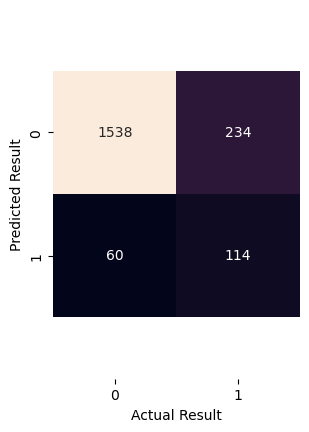

In [39]:
%matplotlib inline
mat = confusion_matrix(predictions, Q2_y_test)
sns.heatmap(mat, square=True, annot=True, fmt='g', cbar=False)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [40]:
#N.
#a.
accuracy_score(Q2_y_test,predictions)

0.8489208633093526

In [41]:
#b.
sensitivity=112/(112+236)
sensitivity

0.3218390804597701

In [42]:
#c.
speficity=1539/(1559+59)
speficity

0.9511742892459827

In [43]:
#d.
precision=112/(112+59)
precision

0.6549707602339181

In [44]:
#e.
balanced_accuracy=(sensitivity+speficity)/2
balanced_accuracy

0.6365066848528764

O.
#a.Comparing the accurcy of the 2 sets can evaluate if the model works very well on training set but works badly on testing set. Too high of accuracy aganist training set can cause overfiting problem. If the model works well on both the training set and test set and has no voerfitting problem.

In [45]:
accuracy_score(Q2_y_test,predictions)

0.8489208633093526

In [46]:
predictions1=logmodel.predict(Q2_X_train)


In [47]:
accuracy_score(Q2_y_train,predictions1)
print(Q2_X_train)

       Age  CityTier  DurationOfPitch  NumberOfFollowups  \
1764  37.0         1             15.0                3.0   
4068  33.0         3             15.0                4.0   
2120  43.0         1              6.0                3.0   
87    51.0         1             15.0                3.0   
3363  60.0         1             25.0                4.0   
...    ...       ...              ...                ...   
495   27.0         3              8.0                3.0   
1902  34.0         1              8.0                4.0   
210   32.0         3             10.0                5.0   
3971  36.0         1             30.0                4.0   
1727  40.0         1              8.0                3.0   

      PreferredPropertyStar  NumberOfTrips  Passport  PitchSatisfactionScore  \
1764                    3.0            2.0         1                       1   
4068                    3.0            3.0         0                       4   
2120                    3.0            

#b.accuracies are very close, which means my model works well on both the training set and test set, and has no overfitting problem.

P.
a.#this household did not take the return offer.

In [48]:
DF_household=pd.DataFrame([{'Age':30,'CityTier':1, 'DurationOfPitch':6.0, 'NumberOfFollowups':2.0,
 'PreferredPropertyStar':4.0, 'NumberOfTrips':2.0,'Passport':1.0,
 'PitchSatisfactionScore':4.0, 'TypeofContact_Self Enquiry':0, 'Gender_Female':0,
 'Gender_Male':1, 'ProductPitched_Deluxe':1, 'ProductPitched_King':0,
 'ProductPitched_Standard':1, 'ProductPitched_Super Deluxe':0,
 'MaritalStatus_Married':0, 'MaritalStatus_Single':1, 'MaritalStatus_Unmarried':0}])
res_prediction=logmodel.predict(DF_household)
print(res_prediction)

[0]


b.the probability that the household will
accept the offer is between 0.83184418 and 0.16815582.

In [49]:
prepro = logmodel.predict_proba(DF_household)
print(prepro)

[[0.8450427 0.1549573]]


Q.use values within the range of the dataset used to build the model will make the prediction result more accurate and make the prediction result closer to the real value.

a.the age influence the result is very strong.If the age>24 the ProdTaken is 0,but if the age< or =24 
the ProdTaken is 0.

In [50]:
dfQ_X=df3[['Age','CityTier','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore']]
dfQ_y=df3['ProdTaken']
QQ_logmodel = LogisticRegression()
QQ_logmodel.fit(dfQ_X, dfQ_y)



Ndf=pd.DataFrame([{'Age':24,'CityTier':5,'DurationOfPitch':66,'NumberOfFollowups':4.0,
                   'PreferredPropertyStar':4.0,'NumberOfTrips':1.0,'Passport':0,'PitchSatisfactionScore':4.0}])
res_prediction = QQ_logmodel.predict(Ndf)
print(res_prediction)

[1]


# Part II

In [51]:
#R.
rdf=pd.read_csv('travel.csv')

In [52]:
rdf.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [53]:
rdf.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [54]:
#R.
rdf_f2 = pd.get_dummies(rdf,columns=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 
                                  'ProductPitched'])

In [55]:
#S.
print(rdf_f2.isnull().sum())

CustomerID                         0
ProdTaken                          0
Age                              226
CityTier                           0
DurationOfPitch                  251
NumberOfPersonVisiting             0
NumberOfFollowups                 45
PreferredPropertyStar             26
NumberOfTrips                    140
Passport                           0
PitchSatisfactionScore             0
OwnCar                             0
NumberOfChildrenVisiting          66
MonthlyIncome                    233
TypeofContact_Company Invited      0
TypeofContact_Self Enquiry         0
Occupation_Free Lancer             0
Occupation_Large Business          0
Occupation_Salaried                0
Occupation_Small Business          0
Gender_Fe Male                     0
Gender_Female                      0
Gender_Male                        0
MaritalStatus_Divorced             0
MaritalStatus_Married              0
MaritalStatus_Single               0
MaritalStatus_Unmarried            0
D

In [56]:
rdf_f2['Age']=rdf_f2['Age'].fillna(rdf_f2['Age'].median())
rdf_f2['DurationOfPitch']=rdf_f2['DurationOfPitch'].fillna(rdf_f2['DurationOfPitch'].median())
rdf_f2['NumberOfFollowups']=rdf_f2['NumberOfFollowups'].fillna(rdf_f2['NumberOfFollowups'].median())
rdf_f2['PreferredPropertyStar']=rdf_f2['PreferredPropertyStar'].fillna(rdf_f2['PreferredPropertyStar'].median())
rdf_f2['NumberOfTrips']=rdf_f2['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
rdf_f2['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(rdf_f2['NumberOfChildrenVisiting'].median())
rdf_f2['MonthlyIncome']=rdf_f2['MonthlyIncome'].fillna(rdf_f2['MonthlyIncome'].median())

In [57]:
rdf_f2

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,0,0,1,0,0,0,1,0,0,0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,0,0,1,0,0,0,1,0,0,0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,0,1,0,0,0,1,0,0,0,0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,0,1,0,0,0,1,0,0,0,0
4,200004,0,36.0,1,8.0,2,3.0,4.0,1.0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,...,0,0,1,0,0,0,1,0,0,0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,...,0,1,0,0,0,1,0,0,0,0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,...,0,0,0,1,0,0,0,0,1,0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [58]:
rdf_f2=rdf_f2.dropna()

In [59]:
rdf_f2

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,0,0,1,0,0,0,1,0,0,0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,0,0,1,0,0,0,1,0,0,0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,0,1,0,0,0,1,0,0,0,0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,0,1,0,0,0,1,0,0,0,0
4,200004,0,36.0,1,8.0,2,3.0,4.0,1.0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,...,0,0,1,0,0,0,1,0,0,0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,...,0,1,0,0,0,1,0,0,0,0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,...,0,0,0,1,0,0,0,0,1,0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [60]:
#T.
from sklearn.model_selection import train_test_split
X=rdf_f2[['Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Self Enquiry', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King',
       'ProductPitched_Standard', 'ProductPitched_Super Deluxe',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried']]
y=rdf_f2['ProdTaken']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=91)

In [61]:
#U.
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf

RandomForestClassifier()

In [62]:
#V.
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
11,0.141679,MonthlyIncome
0,0.135520,Age
2,0.100948,DurationOfPitch
6,0.067725,NumberOfTrips
7,0.060431,Passport
8,0.057186,PitchSatisfactionScore
4,0.054025,NumberOfFollowups
5,0.040627,PreferredPropertyStar
1,0.035863,CityTier
10,0.029437,NumberOfChildrenVisiting


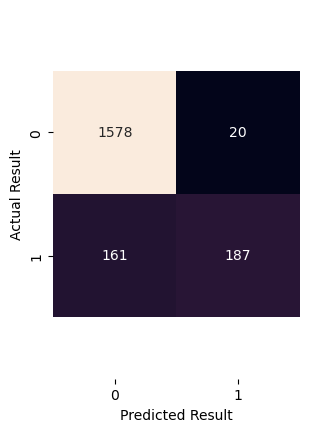

In [63]:
#W.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.906988694758479


In [65]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1598
           1       0.90      0.54      0.67       348

    accuracy                           0.91      1946
   macro avg       0.91      0.76      0.81      1946
weighted avg       0.91      0.91      0.90      1946



In [66]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [12, 16, 20],
    'min_samples_leaf': [6, 10, 14],
}

In [67]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 6, 'n_estimators': 100}
